# E-Commerce Customer Behaviour Prediction

## 1. Introduction
#### This notebook demonstrates the process of detecting user churn in an e-commerce retail setting using machine learning techniques.

## 2. Data Import and Exploration

### 2.1 Import Libraries
Import necessary libraries for data manipulation, visualization, and machine learning.

In [198]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.2 Load Data
Load the e-commerce dataset.

In [199]:
# Load the dataset
df = pd.read_csv("E Commerce Dataset(E Comm).csv")

In [200]:
# Displays the first 5 rows
df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,1


## 2.3 Data Overview
Get a brief overview of the dataset.

In [201]:
#Gives the number of rows and colums in a data set 
df.shape

(5630, 20)

In [202]:
#This gives: Column names,Non-null counts,Data types (int64, float64, object, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [203]:
#Returns:
#Count, mean, standard deviation
#Minimum, 25%, 50%, 75%, and maximum values
#Helps identify:Range of values,Possible outliers,Distribution of numerical features
df.describe()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000
mean,52815.500000,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492,0.168384
std,1625.385339,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869,0.374240
min,50001.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000,0.000000
50%,52815.500000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000,0.000000
75%,54222.750000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000,0.000000
max,55630.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000,1.000000


# 3. Data Preprocessing

In [204]:
#Repalcing the mobile with mobile phone as they are same but just different names
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [205]:
#Dropping the customer ID as it does not help in predictions
df.drop('CustomerID', axis=1, inplace=True)

In [206]:
#Displays the unique values in each and every column , to have idea
for column in df.columns:
    unique_values = df[column].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    print(f"Unique values in '{column}' column: {unique_values_str}")


Unique values in 'Tenure' column: 4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 14.0, 8.0, 18.0, 5.0, 2.0, 30.0, 1.0, 23.0, 3.0, 29.0, 6.0, 26.0, 28.0, 7.0, 24.0, 25.0, 10.0, 15.0, 22.0, 27.0, 16.0, 12.0, 21.0, 17.0, 50.0, 60.0, 31.0, 51.0, 61.0
Unique values in 'PreferredLoginDevice' column: Mobile Phone, Phone, Computer
Unique values in 'CityTier' column: 3, 1, 2
Unique values in 'WarehouseToHome' column: 6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, 31.0, 18.0, 13.0, 20.0, 29.0, 28.0, 26.0, 14.0, nan, 10.0, 27.0, 17.0, 23.0, 33.0, 19.0, 35.0, 24.0, 16.0, 25.0, 32.0, 34.0, 5.0, 21.0, 126.0, 7.0, 36.0, 127.0
Unique values in 'PreferredPaymentMode' column: Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card
Unique values in 'Gender' column: Female, Male
Unique values in 'HourSpendOnApp' column: 3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0
Unique values in 'NumberOfDeviceRegistered' column: 3, 4, 5, 2, 1, 6
Unique values in 'PreferedOrderCat' column: Laptop & Accessory, Mobile Phone, Ot

In [207]:
# Counts the number of duplicate rows in the data set
df.duplicated().sum()

556

In [208]:
#To drop the duplicate rows from the data set of 5630 rows
df.drop_duplicates()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224,0
5624,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155,0
5626,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225,0
5627,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186,0


In [209]:
#Checks the null values
df.isna().sum()

Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
Churn                            0
dtype: int64

In [210]:
#Drops all the null values
df.dropna(inplace = True)

In [211]:
#Again checking the nul values
df.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

In [212]:
#Shape of the data set
df.shape

(3774, 19)

# 4. Encoding Categorical Variables

In [213]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
import pandas as pd

categorical_columns = {
    'PreferredLoginDevice': ['Mobile Phone', 'Phone', 'Computer'],
    'PreferredPaymentMode': ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card'],
    'Gender': ['Female', 'Male'],
    'PreferedOrderCat': ['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery'],
    'MaritalStatus': ['Single', 'Divorced', 'Married']
}

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to each categorical column
for col, categories in categorical_columns.items():
    label_encoders[col].fit(categories)
    df[col] = label_encoders[col].transform(df[col])

# Print the encoded DataFrame
df


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160,1
3,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134,1
5,0.0,0,1,22.0,4,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139,1
11,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154,1
12,0.0,2,1,11.0,1,1,2.0,3,3,3,2,2,1,13.0,2.0,2.0,2.0,134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1.0,1,3,12.0,6,0,2.0,5,3,3,2,2,0,19.0,2.0,2.0,1.0,155,0
5625,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,151,0
5627,1.0,1,1,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186,0
5628,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,179,0


## 5. Check Class Imbalance

Number of customers who churned: 631
Number of customers who did not churn: 3143
Churn ratio: 0.20


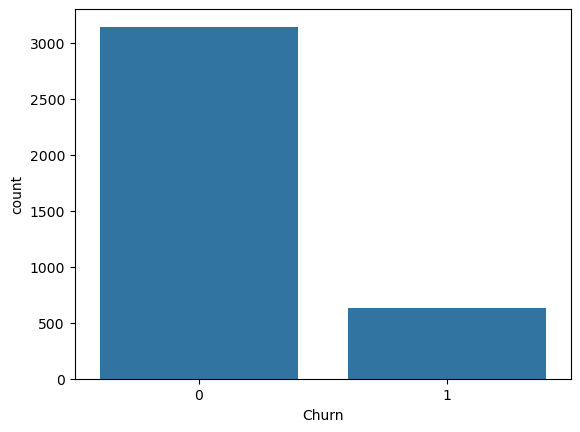

In [214]:


churn_counts = df['Churn'].value_counts()

print(f"Number of customers who churned: {churn_counts[1]}")
print(f"Number of customers who did not churn: {churn_counts[0]}")

churn_ratio = churn_counts[1] / churn_counts[0]
print(f"Churn ratio: {churn_ratio:.2f}")


sns.countplot(x = 'Churn', data = df)
plt.show()


## 5.1 Customer retention rate

In [215]:

customer_retention_rate = (1 - churn_ratio) * 100
print(f"Customer retention rate: {customer_retention_rate:.2f}%")


Customer retention rate: 79.92%


## 5.2 Show Churn and Non-churn user based on Gender

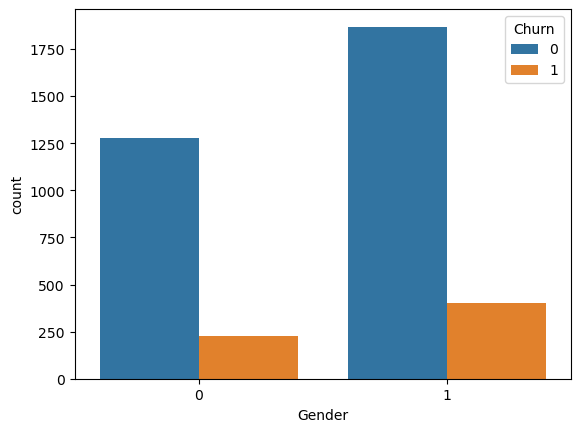

In [216]:


sns.countplot(x = 'Gender', hue = 'Churn', data = df)
plt.show()


# 6. Splitting Data

Splitting data using K-Fold

In [217]:

df = df.reset_index(drop=True)

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize lists to hold train and test sets
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for train_index, test_index in kfold.split(df):
    X_train, X_test = df.drop(columns='Churn').iloc[train_index], df.drop(columns='Churn').iloc[test_index]
    y_train, y_test = df['Churn'].iloc[train_index], df['Churn'].iloc[test_index]

    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Now you have the train and test sets for each fold stored in lists


# Convert X_test into a DataFrame
test_data = pd.DataFrame(X_test, columns=df.drop(columns='Churn').columns)

# Add y_test as the last column
test_data['Churn'] = y_test.values  

## 6.1 Correlation Matrix

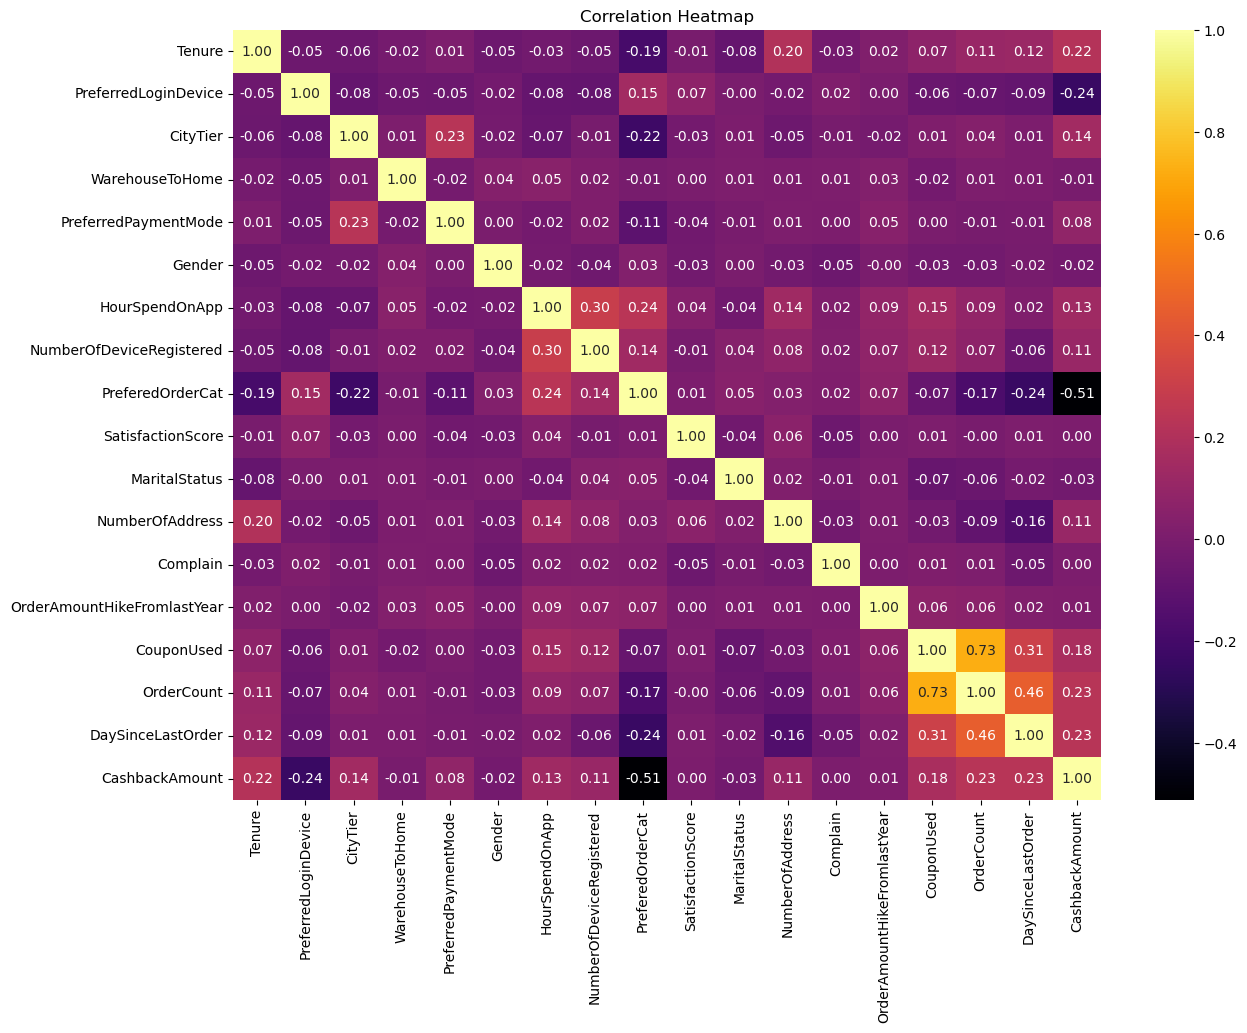

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X_train.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


# 7. Customer Segmentation using K-Means Clustering

#### Train the K-Means clustering model on the training data.
#### Assign cluster labels to the training data.
#### Analyze each cluster by examining the characteristics of the customers in each group.

In [219]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
train_labels = kmeans.labels_
X_train['Cluster'] = train_labels
for i in range(kmeans.n_clusters):
    cluster_data = X_train[X_train['Cluster'] == i]
    print(f"Cluster {i + 1}:")
    print(f"- Number of customers: {len(cluster_data)}")
    print(f"- Average tenure: {cluster_data['Tenure'].mean():.2f}")
    print(f"- Preferred login device: {cluster_data['PreferredLoginDevice'].mode()[0]}")
    print(f"- Citytier: {cluster_data['CityTier'].mode()[0]}")
    print(f"- Preferred order category: {cluster_data['PreferedOrderCat'].mode()[0]}")
    print()



Cluster 1:
- Number of customers: 1274
- Average tenure: 7.00
- Preferred login device: 2
- Citytier: 1
- Preferred order category: 3

Cluster 2:
- Number of customers: 194
- Average tenure: 14.61
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 0

Cluster 3:
- Number of customers: 675
- Average tenure: 9.93
- Preferred login device: 1
- Citytier: 3
- Preferred order category: 2

Cluster 4:
- Number of customers: 867
- Average tenure: 9.15
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 2

Cluster 5:
- Number of customers: 10
- Average tenure: 7.40
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 2



For example, in Cluster 1, there are 2672 customers with an average tenure of 8.98 months. The majority of customers in this cluster prefer login device Mobile phone, belong to city tier 1, and prefer order category Laptop & Accessory.

# 8. Visualizing Churn Characteristics

#### Visualize the distribution of customer tenure for churned and non-churned customers.
#### Visualize the distribution of customer satisfaction scores for churned and non-churned customers.


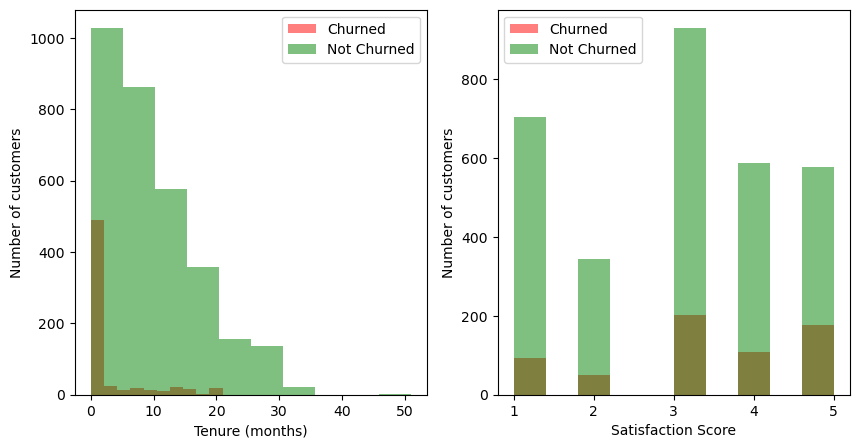

In [220]:

churn_data = df[df['Churn'] == 1]
non_churn_data = df[df['Churn'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(churn_data['Tenure'], bins=10, label='Churned', color='red', alpha=0.5)
ax1.hist(non_churn_data['Tenure'], bins=10, label='Not Churned', color='green', alpha=0.5)
ax1.set_xlabel('Tenure (months)')
ax1.set_ylabel('Number of customers')
ax1.legend()

ax2.hist(churn_data['SatisfactionScore'], bins=10, label='Churned', color='red', alpha=0.5)
ax2.hist(non_churn_data['SatisfactionScore'], bins=10, label='Not Churned', color='green', alpha=0.5)
ax2.set_xlabel('Satisfaction Score')
ax2.set_ylabel('Number of customers')
ax2.legend()

plt.show()


# 9. Balancing the Dataset with SMOTE

## Apply SMOTE
Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by oversampling the minority class.

## Check Resampled Class Distribution
Check the distribution of the churned and non-churned classes after applying SMOTE.

## Visualize Resampled Class Distribution
Visualize the distribution of the churned and non-churned classes after applying SMOTE.

Number of customers who churned after SMOTE: 2525
Number of customers who did not churn after SMOTE: 2525
Churn ratio after SMOTE: 1.00


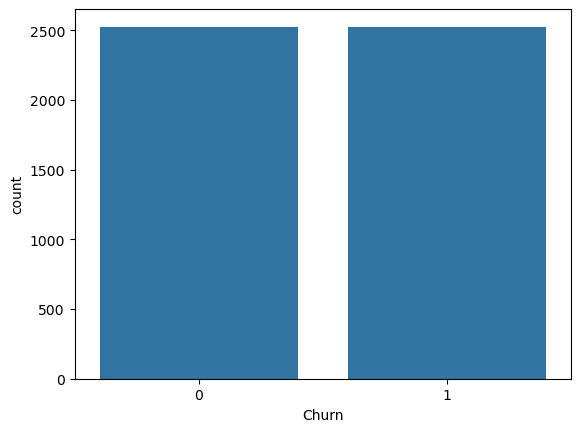

In [221]:

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

churn_counts_resampled = y_train_resampled.value_counts()

print(f"Number of customers who churned after SMOTE: {churn_counts_resampled[1]}")
print(f"Number of customers who did not churn after SMOTE: {churn_counts_resampled[0]}")

churn_ratio_resampled = churn_counts_resampled[1] / churn_counts_resampled[0]
print(f"Churn ratio after SMOTE: {churn_ratio_resampled:.2f}")

sns.countplot(x='Churn', data=pd.DataFrame(y_train_resampled))
plt.show()


In [222]:
X_train_resampled.head(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160,3
1,0.0,0,1,22.0,4,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139,0
2,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154,0
3,0.0,2,1,15.0,0,1,3.0,4,3,3,0,1,1,17.0,0.0,1.0,0.0,134,0
4,9.0,1,3,15.0,3,1,3.0,4,0,2,2,2,0,16.0,0.0,4.0,7.0,196,2


In [223]:
common_features = X_train_resampled.columns.intersection(X_test.columns)
X_train_resampled = X_train_resampled[common_features]
X_test = X_test[common_features]

In [224]:
X_train_resampled.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,0.0,0,1,22.0,4,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139
2,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154
3,0.0,2,1,15.0,0,1,3.0,4,3,3,0,1,1,17.0,0.0,1.0,0.0,134
4,9.0,1,3,15.0,3,1,3.0,4,0,2,2,2,0,16.0,0.0,4.0,7.0,196


# 10. Dimensionality Reduction with PCA
## Apply PCA
Apply Principal Component Analysis (PCA) to the resampled training data to identify the number of components needed to explain the variance.

## Plot Cumulative Explained Variance
Visualize the cumulative explained variance ratio to determine the optimal number of principal components.

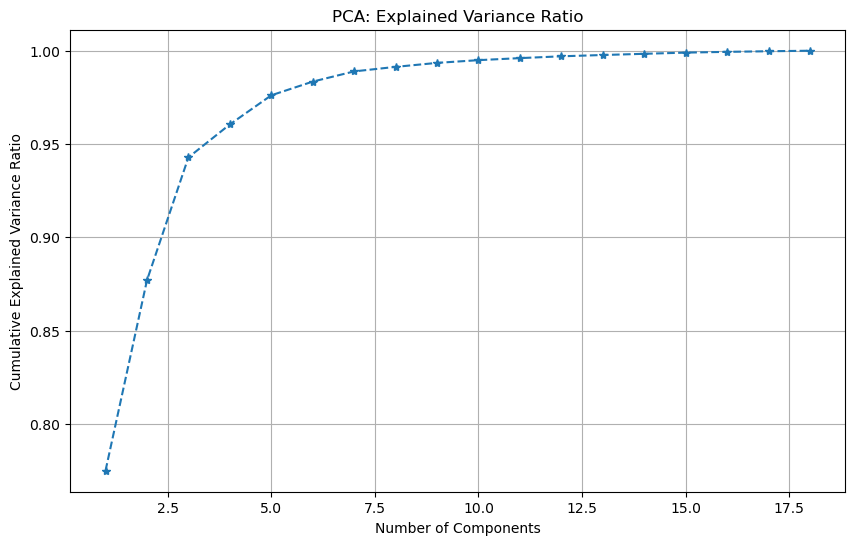

In [225]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_resampled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_explained_variance, marker='*', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

In [226]:
# Apply PCA
common_features = X_train_resampled.columns.intersection(X_test.columns)
X_train_resampled = X_train_resampled[common_features]
X_test = X_test[common_features]

pca = PCA()
pca.fit(X_train_resampled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca_optimal = PCA(n_components=optimal_components)
X_train_pca = pca_optimal.fit_transform(X_train_resampled)
X_test_pca = pca_optimal.transform(X_test)


In [227]:
X_test

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,0.0,2,1,11.0,1,1,2.0,3,3,3,2,2,1,13.0,2.0,2.0,2.0,134
11,20.0,1,1,29.0,3,0,3.0,3,0,2,0,2,0,12.0,11.0,15.0,6.0,203
16,5.0,0,3,14.0,5,0,2.0,3,0,2,2,2,0,14.0,2.0,3.0,7.0,190
19,30.0,2,1,15.0,0,0,3.0,4,3,4,0,5,1,20.0,1.0,1.0,0.0,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,26.0,0,3,36.0,4,1,3.0,4,3,1,1,4,0,16.0,2.0,2.0,1.0,160
3753,1.0,1,1,8.0,3,1,3.0,4,3,1,1,11,1,15.0,3.0,3.0,3.0,173
3757,10.0,0,3,22.0,5,1,3.0,6,2,1,1,3,0,25.0,6.0,12.0,12.0,179
3758,6.0,2,1,9.0,1,1,4.0,4,3,5,2,3,0,15.0,1.0,2.0,3.0,149


In [228]:
X_train_pca

array([[ -2.61140154, -10.14694425,  -3.50314172,  -4.27961157],
       [-23.7136813 ,   6.64097199,  -2.94931321,   8.50952029],
       [ -8.14135399, -11.17542107,   3.6910866 ,  -5.18554247],
       ...,
       [-17.89072527,  -8.54275104,  -5.1989184 ,   0.99502182],
       [-14.92453835,  -7.70569199,  -5.40256872,  -3.88995323],
       [ -9.90751917,  16.42104764,  -1.31440717,   6.18503364]])

# 11. XGBoost Model
## Train XGBoost Model
Train the XGBoost classifier on the PCA-transformed training data.

## Evaluate Model Performance
Evaluate the performance of the XGBoost model on the PCA-transformed test data.

In [229]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier()
xgb_model.fit(X_train_pca, y_train_resampled)

xgb_y_pred = xgb_model.predict(X_test_pca)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1 Score: {xgb_f1:.2f}")
print(f"Confusion Matrix:\n{xgb_conf_matrix}")




XGBoost Results:
Accuracy: 0.91
Precision: 0.70
Recall: 0.89
F1 Score: 0.79
Confusion Matrix:
[[567  51]
 [ 15 121]]


In [230]:
y_test

1       1
4       1
11      1
16      0
19      0
       ..
3746    0
3753    1
3757    0
3758    0
3763    0
Name: Churn, Length: 754, dtype: int64

In [231]:
xgb_y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

# 12. Hyperparameter Tuning with GridSearchCV for XGBoost Classifier

## Define Parameter Grid
Define the parameter grid for GridSearchCV to optimize XGBoost hyperparameters.
## Perform Grid Search
Perform GridSearchCV to find the best combination of hyperparameters for the XGBoost classifier.
## Best Model Evaluation
Evaluate the best XGBoost model found by GridSearchCV on the test set.

In [232]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

xgb_model = XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train_resampled)


print("Best parameters:")
print(grid_search.best_params_)

best_xgb_model = XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train_pca, y_train_resampled)

best_xgb_y_pred = best_xgb_model.predict(X_test_pca)
best_xgb_accuracy = accuracy_score(y_test, best_xgb_y_pred)
best_xgb_precision = precision_score(y_test, best_xgb_y_pred)
best_xgb_recall = recall_score(y_test, best_xgb_y_pred)
best_xgb_f1 = f1_score(y_test, best_xgb_y_pred)
best_xgb_conf_matrix = confusion_matrix(y_test, best_xgb_y_pred)

print("Best XGBoost Results:")
print(f"Accuracy: {best_xgb_accuracy:.2f}")
print(f"Precision: {best_xgb_precision:.2f}")
print(f"Recall: {best_xgb_recall:.2f}")
print(f"F1 Score: {best_xgb_f1:.2f}")
print(f"Confusion Matrix:\n{best_xgb_conf_matrix}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 0.7}
Best XGBoost Results:
Accuracy: 0.95
Precision: 0.81
Recall: 0.91
F1 Score: 0.86
Confusion Matrix:
[[589  29]
 [ 12 124]]


# 13. Predicting Churn for New Customer Data

## Define and Transform New Customer Data
Define the features of a new customer and transform them using PCA for prediction.

In [233]:
import numpy as np

customer_data = [
    6,  # Tenure
    2,  # PreferredLoginDevice
    1,  # CityTier
    1,  # WarehouseToHome
    2,  # PreferredPaymentMode
    2,  # Gender
    5,  # HourSpendOnApp
    3,  # NumberOfDeviceRegistered
    2,  # PreferedOrderCat
    5,  # SatisfactionScore
    1,  # MaritalStatus
    9,  # NumberOfAddress
    0,  # Complain
    11,  # OrderAmountHikeFromlastYear
    0,  # CouponUsed
    3,  # OrderCount
    5,  # DaySinceLastOrder
    0  # CashbackAmount
]

new_data = np.array(customer_data).reshape(1, -1)

transformed_data = pca_optimal.transform(new_data)

predictions = best_xgb_model.predict(transformed_data)
print(predictions)


[0]



Insights:

- **Tenure:** Customers with higher tenure are less likely to churn. The business should focus on retaining existing customers by providing excellent service and loyalty programs.
- **PreferredLoginDevice:** Customers who prefer to use mobile phones for login are more likely to churn. The business should improve the mobile app experience and make it more user-friendly.
- **SatisfactionScore:** Customers with low satisfaction scores are more likely to churn. The business should focus on improving customer satisfaction by addressing their concerns and resolving issues promptly.
- **OrderCount:** Customers who place fewer orders are more likely to churn. The business should encourage customers to place more orders by offering discounts and promotions.
- **DaySinceLastOrder:** Customers who have not placed an order in a long time are more likely to churn. The business should reach out to these customers and offer them incentives to place an order.

**Recommendations:**

- **Implement a loyalty program:** Offer rewards to customers who stay with the business for a long time. This could include things like discounts, free shipping, or exclusive access to products and services.
- **Improve the mobile app experience:** Make the app more user-friendly and efficient. This could include adding features such as a faster checkout process, a more intuitive interface, and better customer support.
- **Address customer concerns:** Respond to customer complaints and issues promptly and effectively. This shows customers that the business values their feedback and is committed to resolving their problems.
- **Offer discounts and promotions:** Encourage customers to place more orders by offering discounts and promotions. This could include things like free shipping on orders over a certain amount, or a percentage off of their next order.
- **Reach out to inactive customers:** Contact customers who have not placed an order in a long time and offer them incentives to place an order. This could include things like a discount on their next order, or a free gift.

By implementing these recommendations, the business can reduce customer churn and improve customer retention.
